<a href="https://colab.research.google.com/github/artyomchervov/zadanie1/blob/master/newlaba2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

url = "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00"

# чтение данных, можно указать символ разделения столбцов (sep) и многие другие параметры, 
# index_col показывает, какой столбец нужно использовать как индекс строки в таблице
input_df = pd.read_csv(url)

# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()


,Wind_power_MW,Solar_power_kW,Consumption_MW
0,65.655516,0.0000,34.70
1,69.111069,0.0000,32.79
2,72.134678,178.6368,33.09
3,75.590232,721.5360,33.63
4,68.247181,3752.5248,34.51


(8760,)
(8760,)
(8760,)
(8760,)
(8760,)


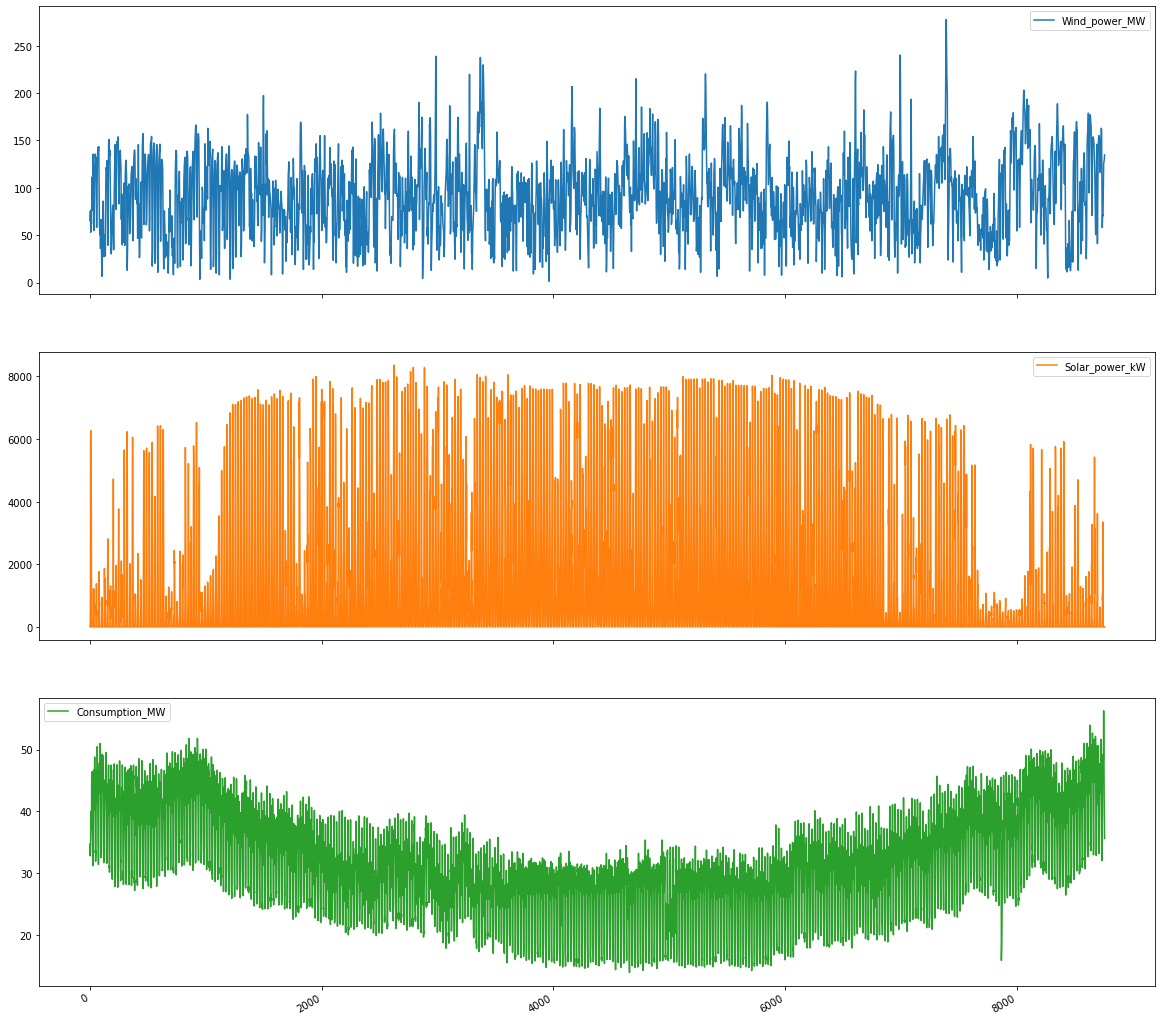

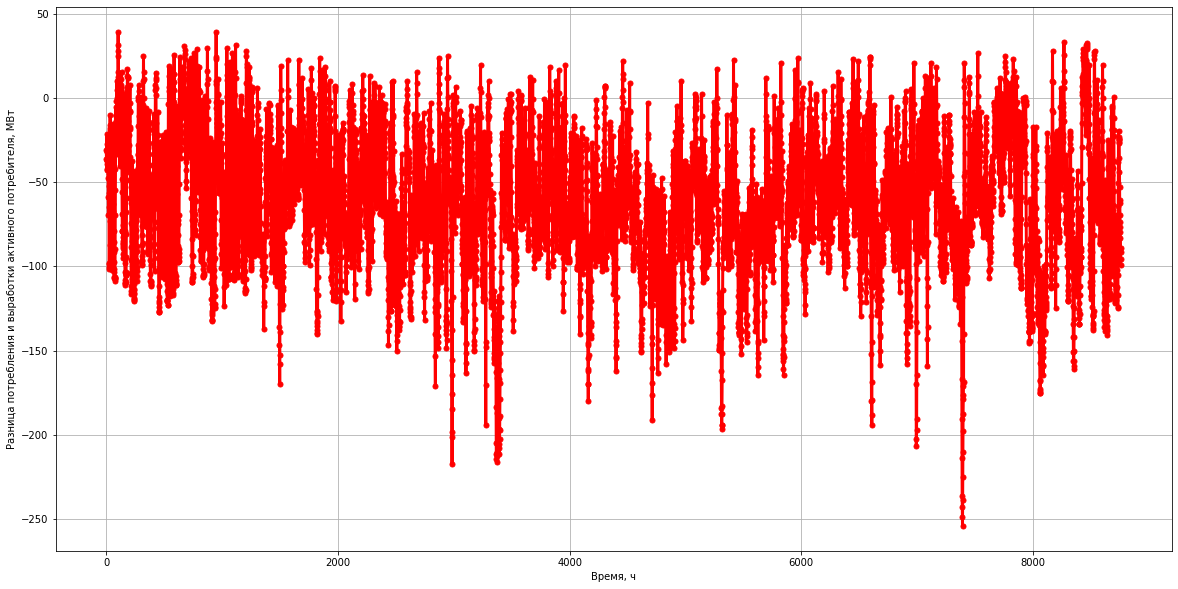

In [2]:
# 3. Просмотр последних строк таблицы
input_df.tail()
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

wind_power = input_df.iloc[: , 0].values
solar_power = input_df.iloc[: , 1].values
consumption = input_df.iloc[: , 2].values

print(wind_power.shape)
print(solar_power.shape)
print(consumption.shape)

windsolar_power = wind_power + (solar_power/1000)
print(windsolar_power.shape)

difference = consumption - windsolar_power 
print(difference.shape)

fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(difference, linewidth = 3, markersize = 5, marker = 'o', color = 'red')

ax.grid(True)
ax.set_xlabel('Время, ч')
ax.set_ylabel('Разница потребления и выработки активного потребителя, МВт')

plt.show()


In [3]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(difference)), difference, line_width = 2)

show(p)


In [4]:
data_frame = pd.DataFrame(difference)
data_frame.to_excel('difference.xlsx', index = False, header = ['difference_MWh'])
data_frame.to_csv('difference.csv', index = False, header = ['difference_Mwh'])

a=0
for i in range(len(difference)):
  a += difference[i]
if (a<0):
  print('Возможна продажа', round(-a, 2), 'МВт электроэнергии')
else:
  print('Требуется покупка', round(a, 2), 'МВт электроэнергии')


Возможна продажа 545274.73 МВт электроэнергии
